# Prepare Data

### Import

In [1]:
from glob import glob

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge



### Explore

In [2]:
files = glob('*.csv') 
files

['crop1.csv', 'food_data.csv', 'live1.csv', 'pop1.csv']

In [3]:
def wrangle(filepath, col):
    '''
    This function creates a subset of the original dataset
    
    input: Filepath for dataset 
    output: Returns subset 
    '''
    df = pd.read_csv(filepath)
    #subsetting for Nigeria only
    mask_NIG = df[col] == 'Nigeria'
    df = df[mask_NIG]
    
    return df

In [4]:

to_be_used = ['crop1.csv', 'live1.csv']

frame = [wrangle(file, 'Area') for file in to_be_used]#list comprehension that calls function
frame = pd.concat(frame, ignore_index= True)#concats both dataset
print(frame.shape)
frame.info()

(7795, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     7795 non-null   object 
 1   Item     7795 non-null   object 
 2   Element  7795 non-null   object 
 3   Year     7795 non-null   int64  
 4   Unit     7795 non-null   object 
 5   Value    7641 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 365.5+ KB


In [5]:
frame.nunique()

Area          1
Item         52
Element       4
Year         60
Unit          6
Value      4762
dtype: int64

**NOTE:** I would join both tables on the YEAR column.

In [6]:
# creates a subset for NIGERIA
NIG_pop = wrangle('pop1.csv', 'Country Name')
NIG_pop

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
174,Nigeria,NGA,45138460.0,46063570.0,47029818.0,48032932.0,49066762.0,50127920.0,51217969.0,52342231.0,...,167228803.0,171765819.0,176404931.0,181137454.0,185960244.0,190873247.0,195874685.0,200963603.0,206139587.0,211400704.0


I cannot concat this table with the frame table above and this is because, they have no columns in column. To that, I would first of all melt the table then merge both tables.

In [7]:
NIG_pop= pd.melt(
    NIG_pop,
    id_vars=['Country Name', 'Country Code'],
    var_name = 'Year',
    value_name = 'Population size'
)

In [8]:
NIG_pop.drop(columns = ['Country Code', 'Country Name'], inplace = True)
print(NIG_pop.shape)
NIG_pop.info()

(62, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             62 non-null     object 
 1   Population size  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [9]:
NIG_pop['Year'] = NIG_pop['Year'].astype('int64')
NIG_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             62 non-null     int64  
 1   Population size  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [25]:
df = pd.merge(frame, NIG_pop, how = 'inner', on = 'Year')
df = df.set_index('Year')
print(df.shape)
df.head()

(7795, 6)


,Area,Item,Element,Unit,Value,Population size
Year,,,,,,
1981,Nigeria,"Bastfibres, other",Area harvested,ha,1000.0,75440505.0
1981,Nigeria,"Bastfibres, other",Yield,hg/ha,5300.0,75440505.0
1981,Nigeria,"Bastfibres, other",Production,tonnes,530.0,75440505.0
1981,Nigeria,Carrots and turnips,Area harvested,ha,20000.0,75440505.0
1981,Nigeria,Carrots and turnips,Yield,hg/ha,75000.0,75440505.0


In [26]:
df=df.drop(columns = 'Area', inplace = False)

Removed the AREA columns because of its low cardinality; meaning it has just one unique value.

In [27]:
df.nunique()

Item                 52
Element               4
Unit                  6
Value              4762
Population size      60
dtype: int64

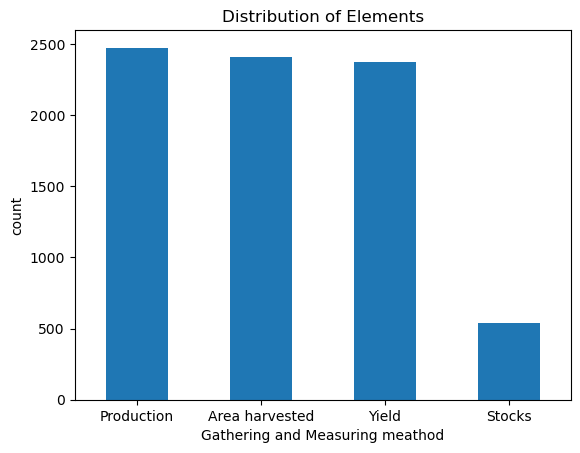

In [28]:
df['Element'].value_counts().plot(
    kind = 'bar', 
    xlabel = 'Gathering and Measuring meathod', 
    ylabel = 'count', title = 'Distribution of Elements')
plt.xticks(rotation = 0);

For crops, it can be identified that each crop is gathered and measured in three ways by production, crop yield, and area harvested. Each of these method of gathering and measurement have their own units of measurement. For production method it is meausred in tonnes, crop yield in hectogram (hg), and finally area is measured in hectares(ha).

While animals are gathered in stocks and measured in Head.

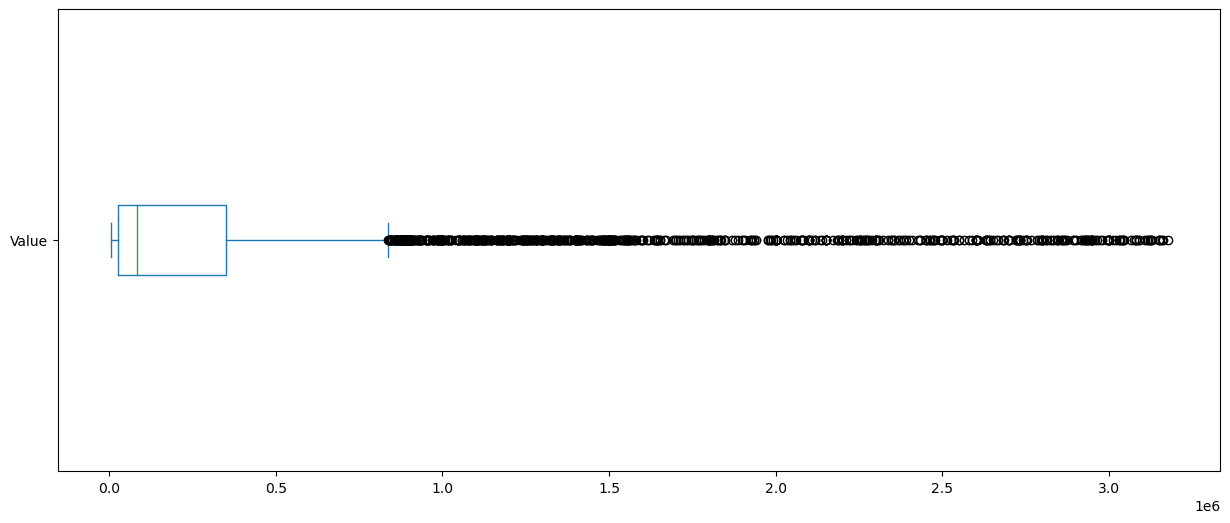

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))
df['Value'].plot(kind = 'box', vert=False);

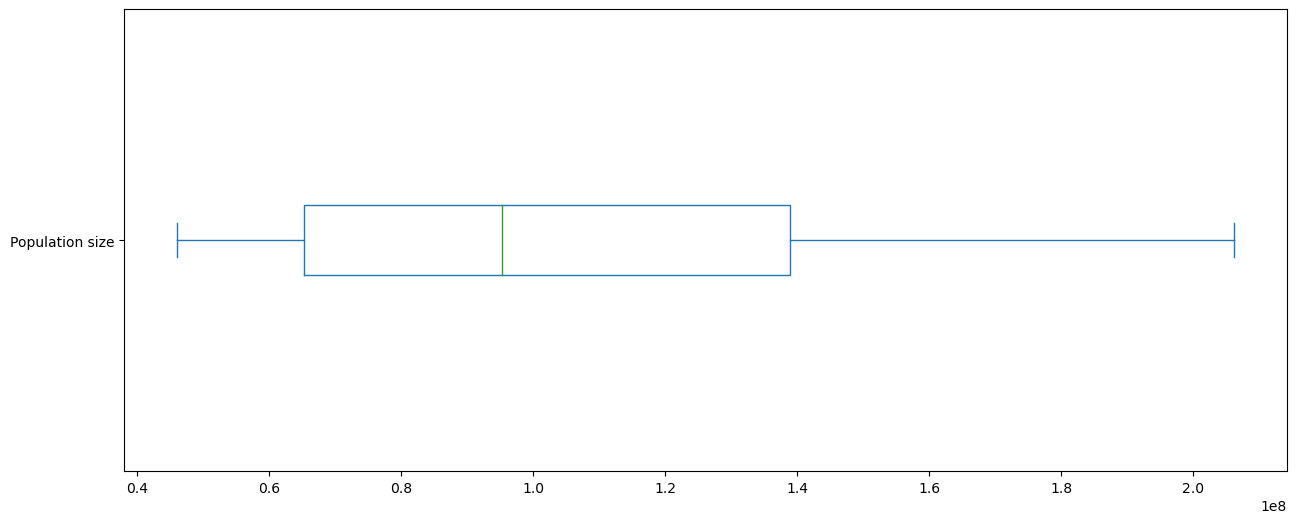

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
df['Population size'].plot(kind = 'box', vert=False);

In [30]:
df.to_csv('food_data.csv', index = False)

### Split

# Build Model

### Baseline

### Iterate

### Evaluate

# Communicate Results